# IPL 2022 Analysis Using Python

__importing necessary libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data=pd.read_csv(r"C:\Users\sanja\Downloads\archive (1)\Book_ipl22_ver_33.csv")
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
data.shape

(74, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [5]:
data.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,74.0,37.500000,21.505813,1.0,19.25,37.5,55.75,74.0
first_ings_score,74.0,171.121622,29.048355,68.0,154.25,169.5,192.75,222.0
first_ings_wkts,74.0,6.135135,2.222699,0.0,5.00,6.0,8.00,10.0
second_ings_score,74.0,158.540541,29.299207,72.0,142.75,160.0,176.00,211.0
second_ings_wkts,74.0,6.175676,2.639832,1.0,4.00,6.0,8.00,10.0
margin,74.0,16.972973,19.651047,2.0,5.25,8.0,18.00,91.0
highscore,74.0,71.716216,20.705052,28.0,57.00,68.0,87.75,140.0


In [7]:
data.dtypes

match_id                int64
date                   object
venue                  object
team1                  object
team2                  object
stage                  object
toss_winner            object
toss_decision          object
first_ings_score        int64
first_ings_wkts         int64
second_ings_score       int64
second_ings_wkts        int64
match_winner           object
won_by                 object
margin                  int64
player_of_the_match    object
top_scorer             object
highscore               int64
best_bowling           object
best_bowling_figure    object
dtype: object

# Q1. Analyze Number of matches won by each team in IPL 2022 ?

In [8]:
data['match_winner'].value_counts()

Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: match_winner, dtype: int64

In [9]:
match_won=data.groupby(['match_winner'])['match_winner'].count()

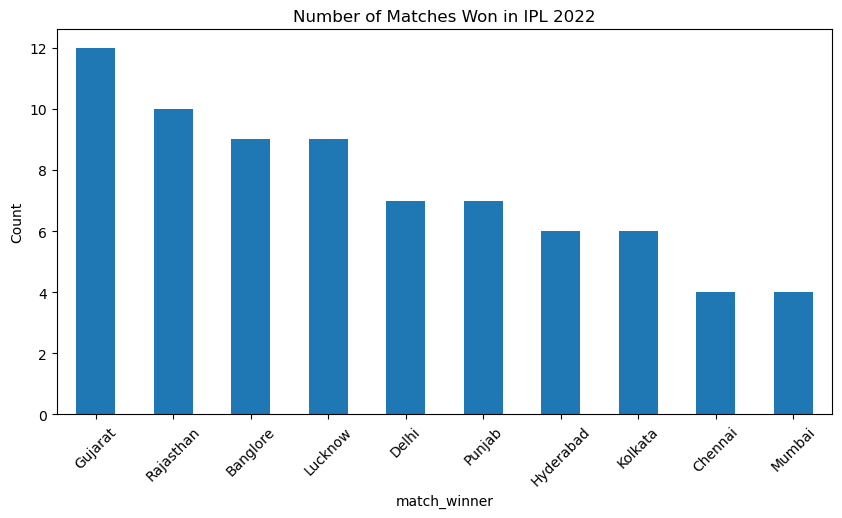

In [10]:
plt.title('Number of Matches Won in IPL 2022')
plt.ylabel('Count')
match_won.sort_values(ascending=False).plot(kind='bar',rot=45,figsize=(10,5))
plt.show()

__So,from above graph we can see the Gujarat is leading the tournament and they are the winner of IPL Season 2022.__

# Q2. Analyze whether most of the teams win by defending (batting first) or chasing (batting second).

In [11]:
winning_type=data['won_by'].map({'Wickets':'Chasing','Runs':'Defending'}).value_counts()
print(winning_type)

Chasing      37
Defending    37
Name: won_by, dtype: int64


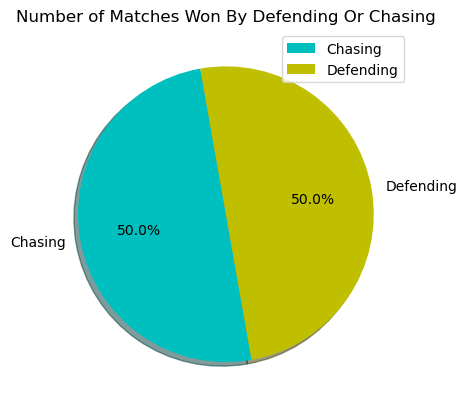

In [12]:
plt.pie(winning_type,labels=['Chasing','Defending'],startangle=100,shadow=True,colors=['c','y'],autopct='%.1f%%')
plt.title('Number of Matches Won By Defending Or Chasing')
plt.legend(loc=1)
plt.show()

__So,37 matches are won while chasing the target, and 37 matches are won while defending the target.__

# Q3. Analyze what most teams prefer (batting or fielding) after winning the toss?

In [13]:
toss_decisions=data['toss_decision'].value_counts()
print(toss_decisions)

Field    59
Bat      15
Name: toss_decision, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

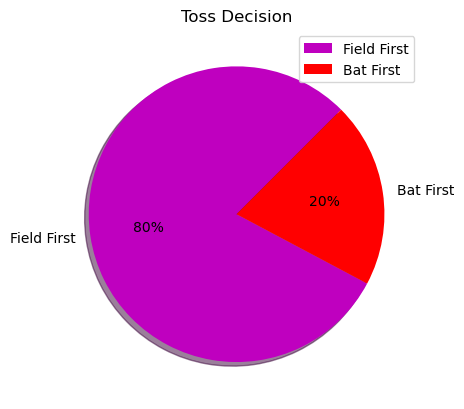

In [14]:
plt.pie(toss_decisions,labels=['Field First','Bat First'],startangle=45,shadow=True,colors=['m','r'],autopct='%0.0f%%')
plt.title('Toss Decision')
plt.legend(loc=1)
plt.show

__Thus, most captains choose to field after winning the toss. So in 59 games, captains have chosen to field first, and in just 15 games, the captains have chosen to bat first.__

# Q4. Analyze Top scorers of most IPL 2022 matches.

In [15]:
data['top_scorer'].value_counts()

Jos Buttler            7
Quinton de Kock        5
Liam Livingstone       4
Shubman Gill           4
KL Rahul               4
W. Saha                3
Faf du Plessis         3
Ishan Kishan           3
David Warner           3
Rahul Tripathi         2
Devon Conway           2
Abhishek Sharma        2
MS Dhoni               2
Hardik Pandya          2
Andre Russell          2
Mitchell Marsh         2
Virat Kohli            2
Deepak Hooda           2
Shikhar Dhawan         2
Ruturaj Gaikwad        1
Yashasvi Jaiswal       1
Sanju Samson           1
Sai Sudharsan          1
Moeen Ali              1
Nitish Rana            1
Shivam Dube            1
Riyan Parag            1
Tilak Varma            1
David Miller           1
Dinesh Karthik         1
Kane Williamson        1
Shimron Hetmyer        1
Suryakumar Yadav       1
Pat Cummins            1
Sherfane Rutherford    1
Aiden Markram          1
Rajat Patidar          1
Name: top_scorer, dtype: int64

<AxesSubplot:xlabel='top_scorer', ylabel='count'>

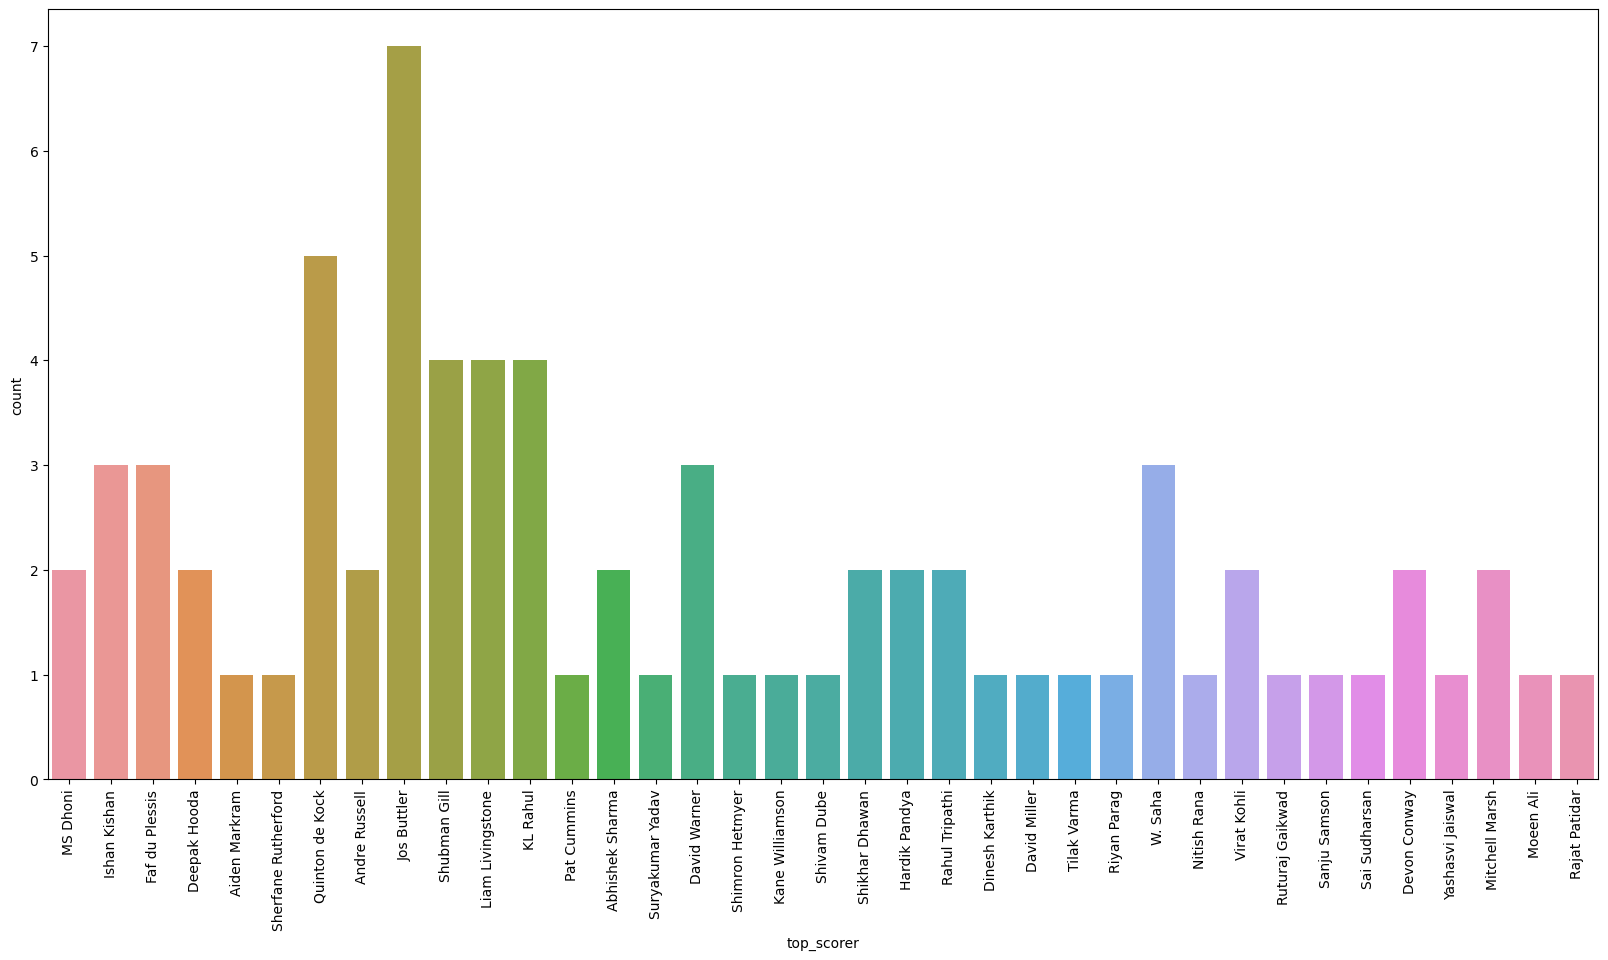

In [16]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x=data['top_scorer'])

__Jos Buttler was the top scorer in 7 matches and Quinton de Kock was in 5 matches in IPL 2022.__

# Q5. Analyze Run score by Top scorers in IPL 2022.

In [17]:
runs_score_by_top_scorers=data.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)
print(runs_score_by_top_scorers)

top_scorer
Jos Buttler            651
Quinton de Kock        377
KL Rahul               351
Shubman Gill           288
Faf du Plessis         257
Liam Livingstone       239
David Warner           213
W. Saha                190
Ishan Kishan           180
Shikhar Dhawan         158
Hardik Pandya          154
Mitchell Marsh         152
Rahul Tripathi         147
Devon Conway           143
Virat Kohli            131
Abhishek Sharma        122
Andre Russell          119
Deepak Hooda           114
Rajat Patidar          112
Ruturaj Gaikwad         99
Shivam Dube             95
David Miller            94
Moeen Ali               93
MS Dhoni                86
Suryakumar Yadav        68
Yashasvi Jaiswal        68
Dinesh Karthik          66
Sai Sudharsan           65
Shimron Hetmyer         59
Aiden Markram           57
Kane Williamson         57
Nitish Rana             57
Riyan Parag             56
Pat Cummins             56
Sanju Samson            54
Tilak Varma             51
Sherfane Rutherfo

<AxesSubplot:xlabel='top_scorer', ylabel='highscore'>

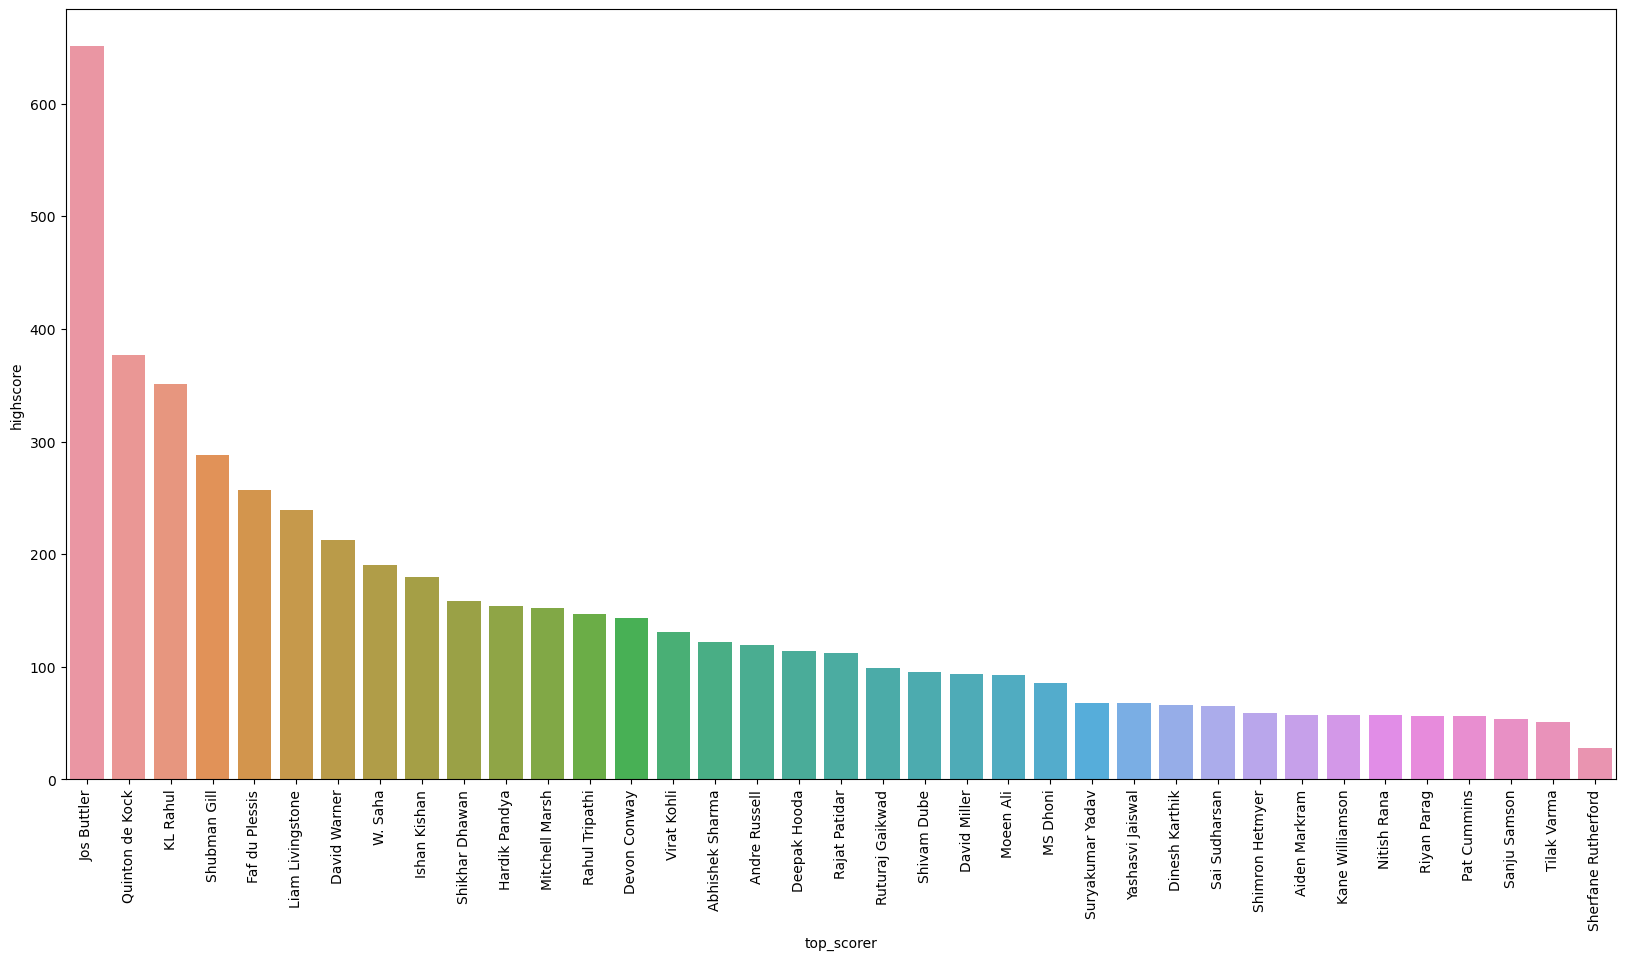

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x=runs_score_by_top_scorers.index,y=runs_score_by_top_scorers)

__So,Jos Buttler was the highest run getter in IPL 2022.__

# Q6. Analyze most player of the match awards in IPL 2022.

In [19]:
awards_won=data['player_of_the_match'].value_counts()
print(awards_won)

Kuldeep Yadav        4
Jos Buttler          3
Umesh Yadav          2
Quinton de Kock      2
David Miller         2
Umran Malik          2
K L Rahul            2
Rahul Tripathi       2
Hardik Pandya        2
Jasprit Bumrah       2
Shubman Gill         2
Yuzvendra Chahal     2
Wanindu Hasaranga    2
Avesh Khan           2
Dinesh Karthik       2
Virat Kohli          1
Rinku Singh          1
Kagiso Rabada        1
Harshal Patel        1
David Warner         1
Harpreet Brar        1
Tim David            1
Yashasvi Jaiswal     1
R Aswin              1
Andre Russell        1
Shardul Thakur       1
Trent Boult          1
Devon Conway         1
W. Saha              1
Mitchell Marsh       1
Mohsin Khan          1
Daniel Sams          1
Jonny Bairstow       1
Ruturaj Gaikwad      1
Rashid Khan          1
Suruakumar Yadav     1
Anuj Rawat           1
Odean Smith          1
Mohammed Shami       1
Sanju Samson         1
Evin Lewis           1
Lockie Ferguson      1
Liam Livingstone     1
Pat Cummins

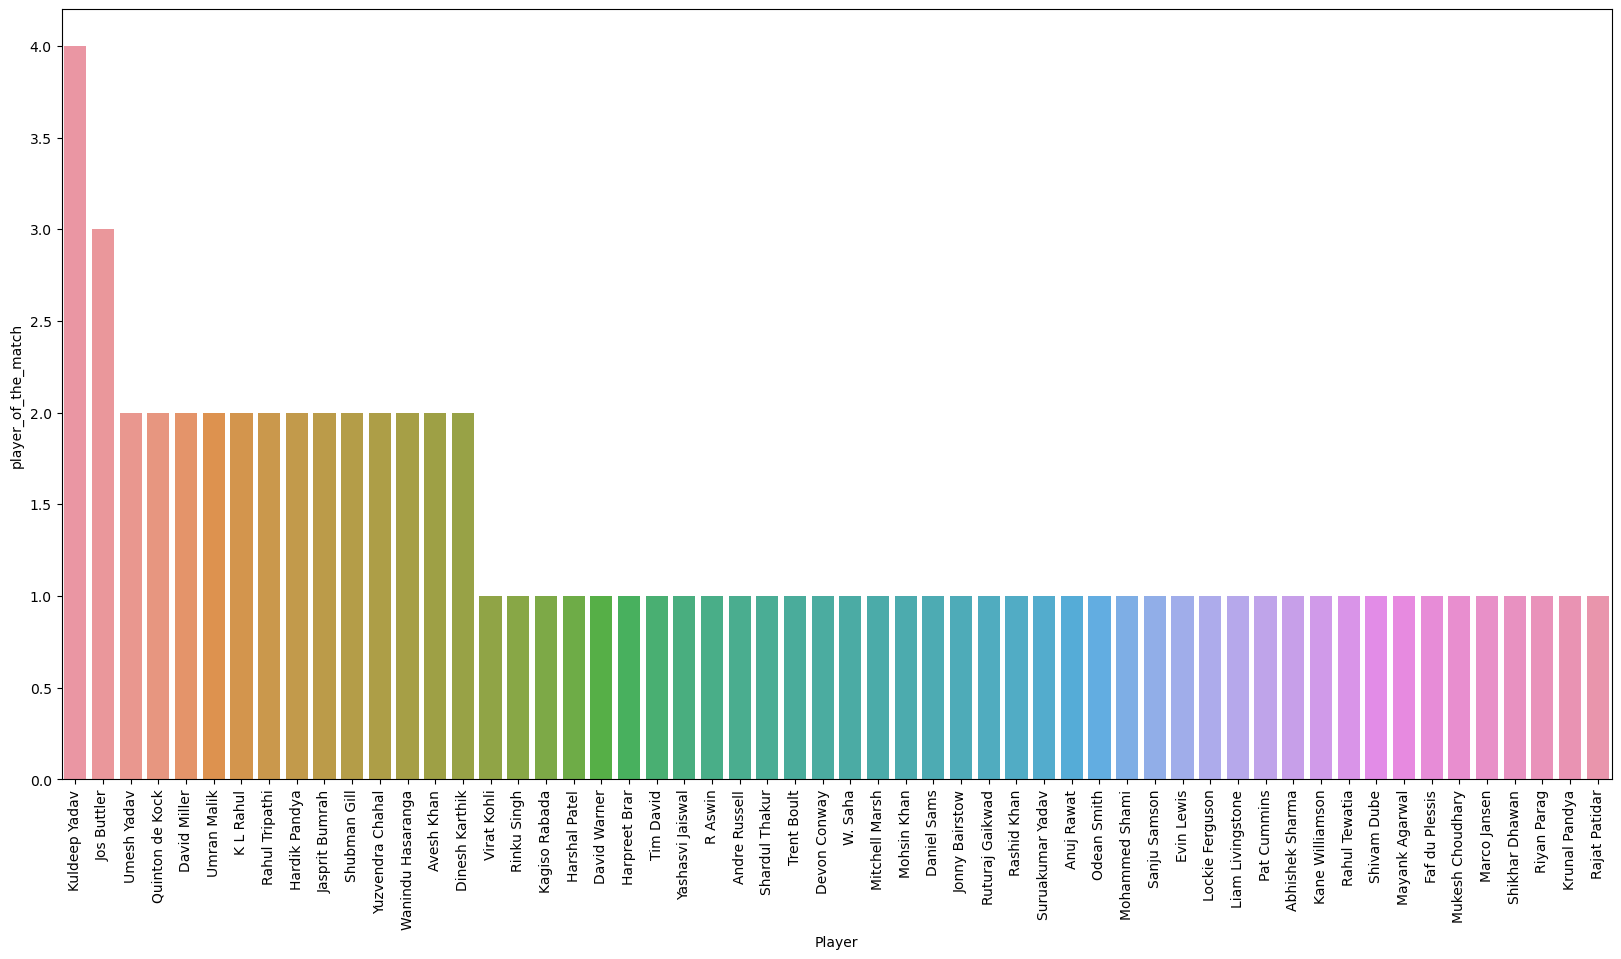

In [20]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel('Player')
sns.barplot(x=awards_won.index,y=awards_won)
plt.show()

 __So Kuldeep Yadav is leading in the list of players of the match awards with four matches.__

# Q7. Analyze the bowlers with the best bowling figures in most of the matches in IPL 2022.

In [21]:
best_bowler=data['best_bowling'].value_counts()
print(best_bowler)

Yuzvendra Chahal      5
Rashid Khan           4
T Natarajan           3
Kagiso Rabada         3
Jasprit Bumrah        3
Kuldeep Yadav         3
Avesh Khan            3
Josh Hazlewood        3
Dwayne Bravo          2
Mohsin Khan           2
Andre Russell         2
Prasidh Krishna       2
Daniel Sams           2
Umran Malik           2
Maheesh Theekshana    2
Hardik Pandya         2
Harshal Patel         2
Lockie Ferguson       2
Ravi Bishnoi          2
Wanindu Hasaranga     2
Mohammed Shami        2
Mukesh Choudhary      1
Harpreet Brar         1
Prashant Solanki      1
Ramandeep Singh       1
Shardul Takur         1
Trent Boult           1
Chetan Sakariya       1
Moeen Ali             1
Khaleel Ahmed         1
Tim Southee           1
Rilley Meredith       1
Mohammed Siraj        1
Washington Sundar     1
Pradeep Sangwan       1
Kuldeep Sen           1
Krunal Pandya         1
Umesh Yadav           1
Rahul Chahar          1
Murugan Ashwin        1
Odean Smith           1
Axar Patel      

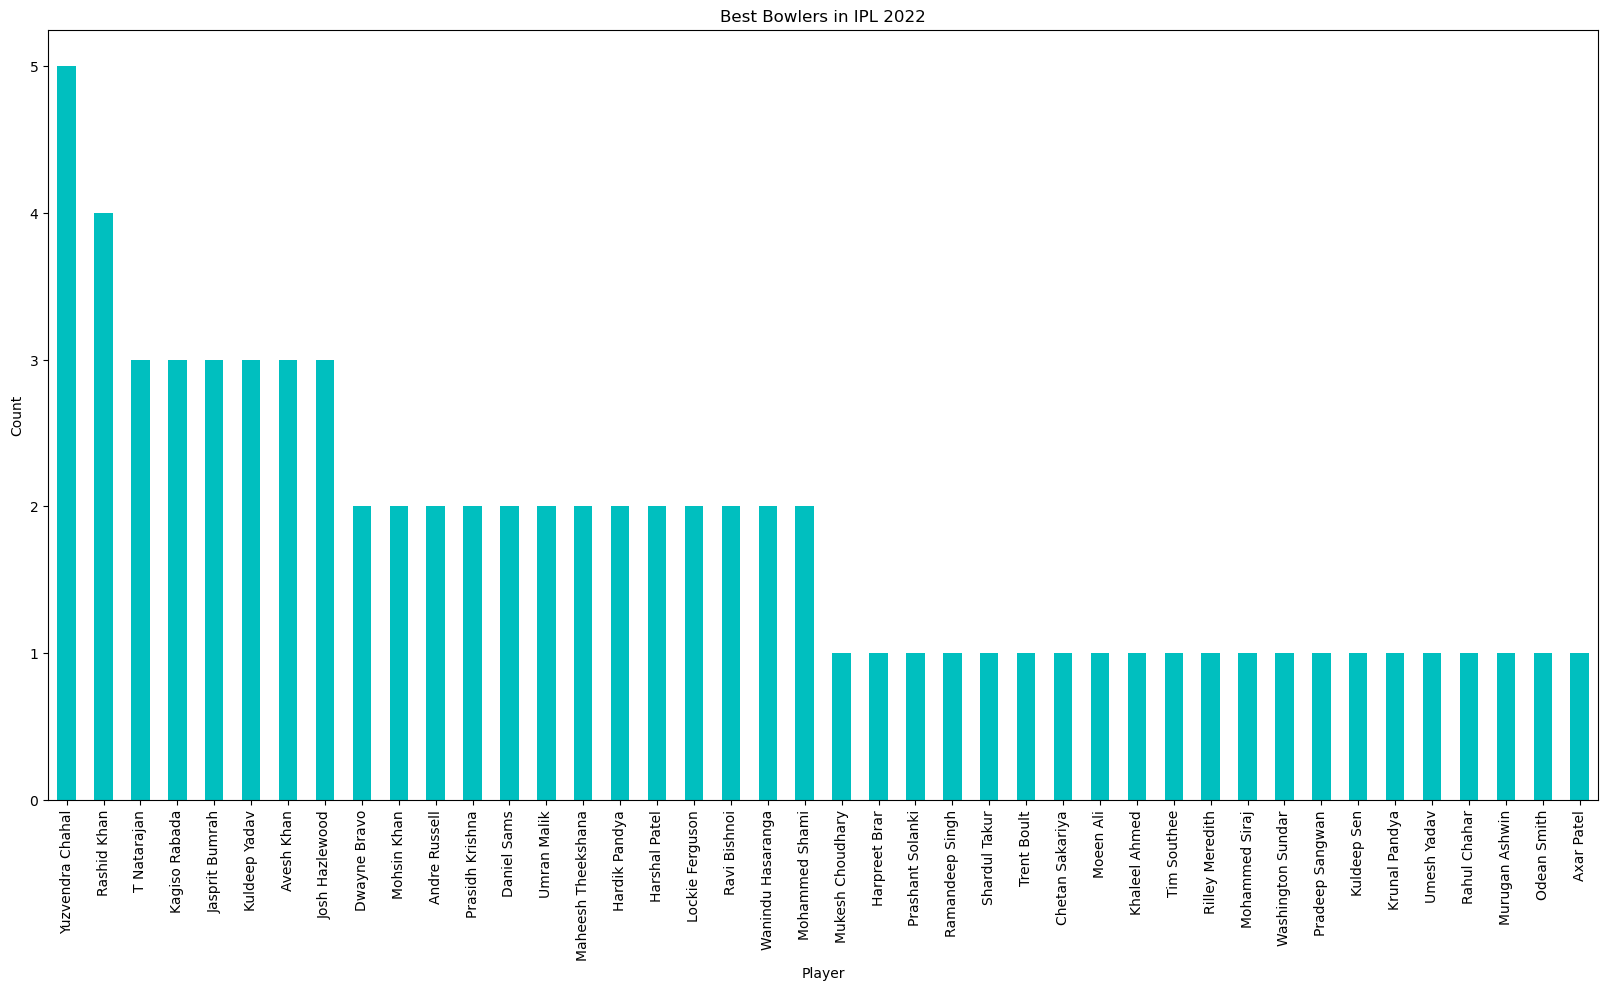

In [22]:
best_bowler.plot(kind='bar',rot=90,figsize=(20,10),xlabel='Player',ylabel='Count',title='Best Bowlers in IPL 2022',color='c')
plt.show()

__So here we can see Yuzvendra Chahal having the best bowling figure in 5 matches in IPL 2022.__

# Q8. Analyze whether most of the wickets fall while setting the target or while chasing the target?

In [23]:
x=data.groupby('venue')['first_ings_wkts','second_ings_wkts'].sum()
x

C:\Users\sanja\AppData\Local\Temp\ipykernel_13156\1309058186.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x=data.groupby('venue')['first_ings_wkts','second_ings_wkts'].sum()


,first_ings_wkts,second_ings_wkts
venue,,
"Brabourne Stadium, Mumbai",107,97
"Dr DY Patil Sports Academy, Mumbai",126,127
"Eden Gardens, Kolkata",10,9
"Maharashtra Cricket Association Stadium,Pune",75,100
"Narendra Modi Stadium, Ahmedabad",17,6
"Wankhede Stadium, Mumbai",119,118


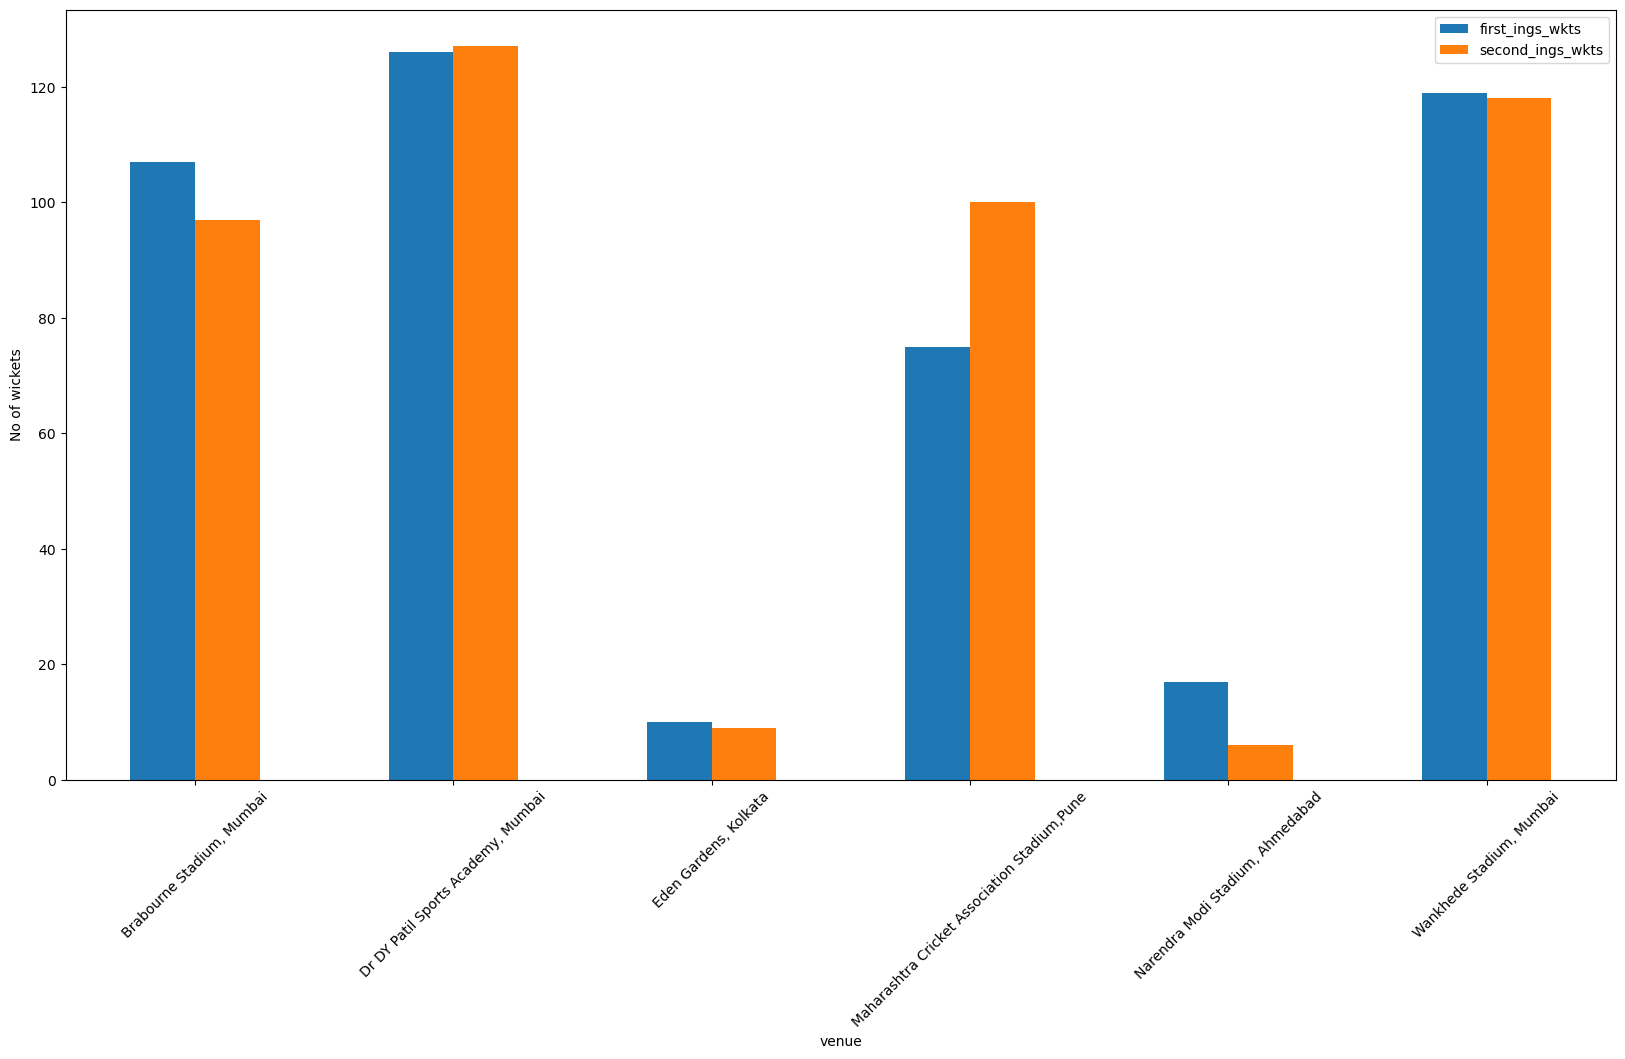

In [24]:
x.plot(kind='bar',figsize=(20,10),ylabel='No of wickets',rot=45)
plt.show()

__So in the Wankhede Stadium in Mumbai and Dr DY Patil Sports Academy, Mumbai, most wickets fall while chasing the target.__

# Q9. Analyzing the runs scored in first inning and second inning in every stadium of IPL world cup of 2022.

In [25]:
runs=data.groupby('venue')['first_ings_score','second_ings_score'].sum()
runs

C:\Users\sanja\AppData\Local\Temp\ipykernel_13156\1563283771.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  runs=data.groupby('venue')['first_ings_score','second_ings_score'].sum()


,first_ings_score,second_ings_score
venue,,
"Brabourne Stadium, Mumbai",2836,2627
"Dr DY Patil Sports Academy, Mumbai",3414,3159
"Eden Gardens, Kolkata",395,384
"Maharashtra Cricket Association Stadium,Pune",2229,1879
"Narendra Modi Stadium, Ahmedabad",287,294
"Wankhede Stadium, Mumbai",3502,3389


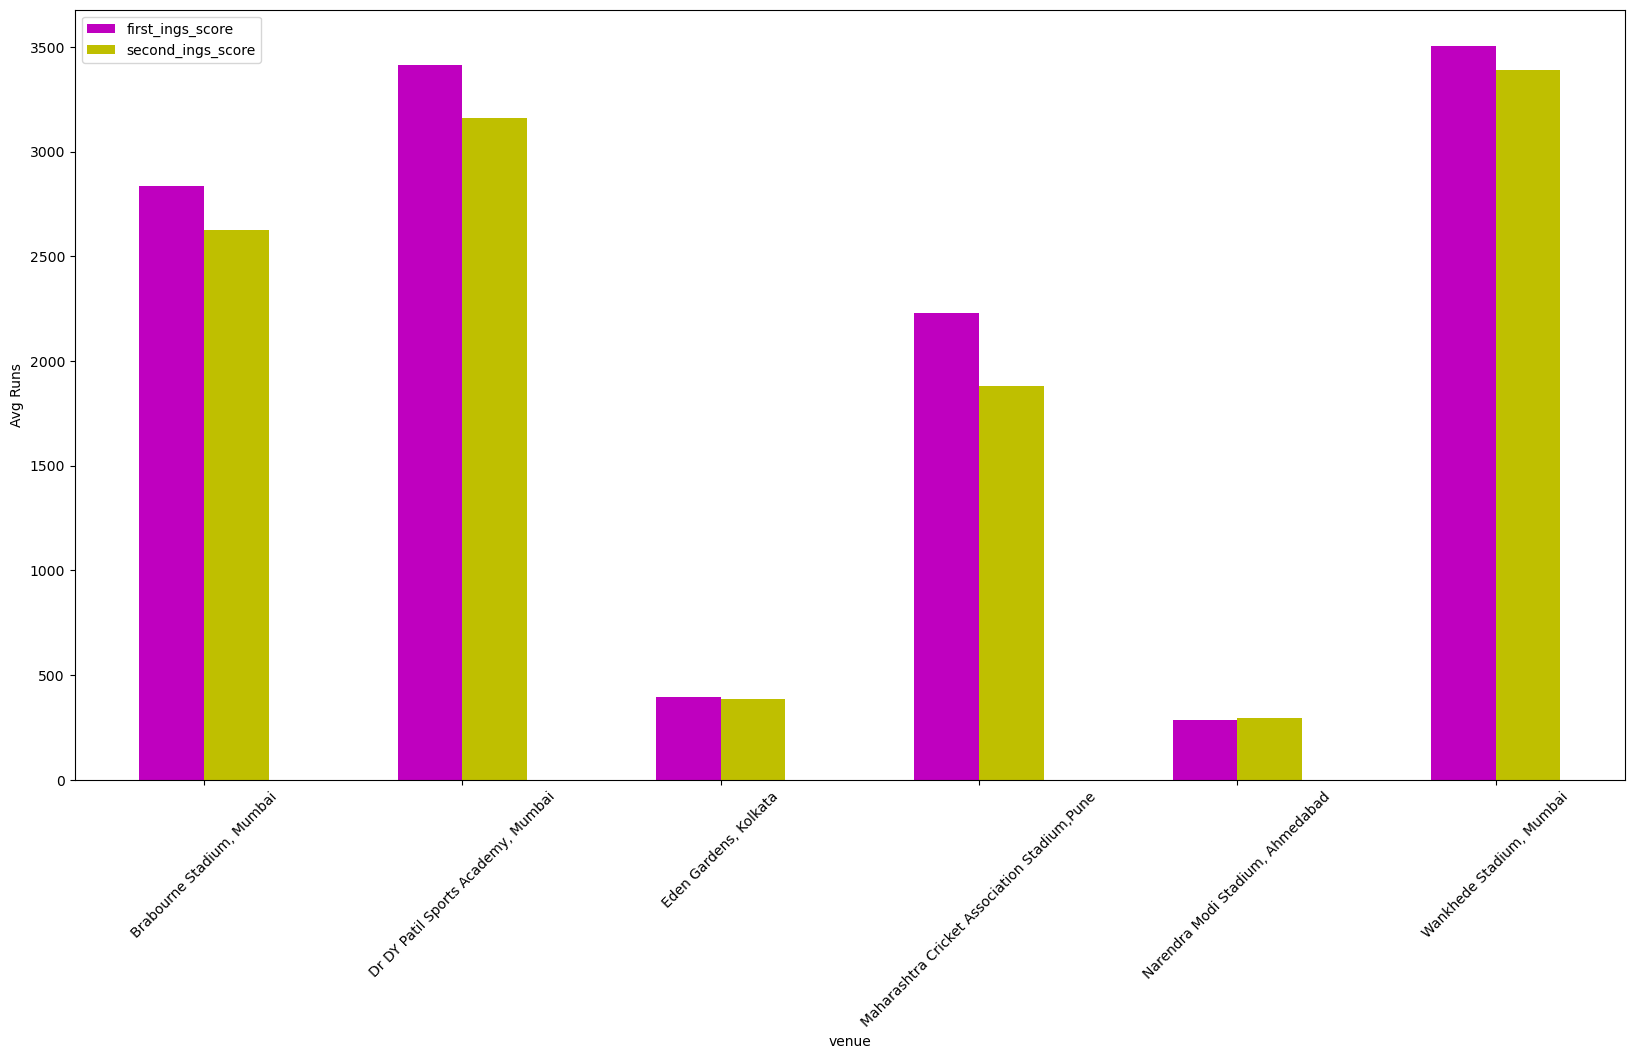

In [26]:
runs.plot(kind='bar',figsize=(20,10),rot=45,ylabel='Avg Runs',color=['m','y'])
plt.show()

__So Both the stadiums which are in mumbai are the best stadiums for batting first or setting target.__

# Q10. Analyze number of matches played on each venue in IPL 2022 .

In [27]:
no_matches=data['venue'].value_counts()
print(no_matches)

Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: venue, dtype: int64


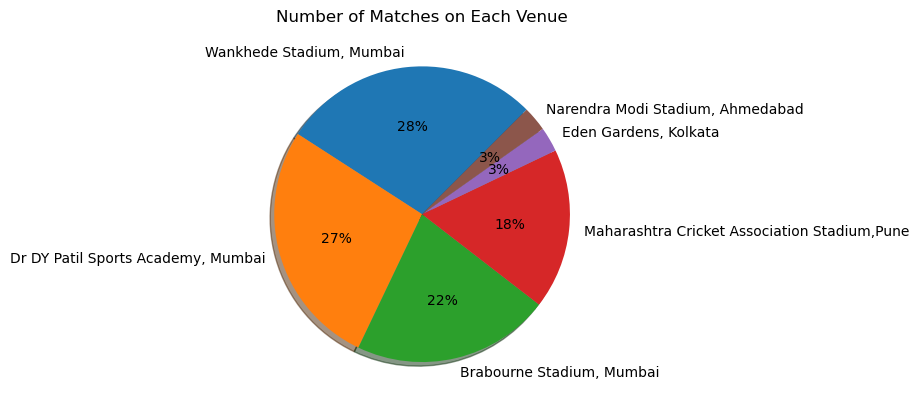

In [29]:
plt.pie(no_matches,labels=['Wankhede Stadium, Mumbai','Dr DY Patil Sports Academy, Mumbai',
                           'Brabourne Stadium, Mumbai','Maharashtra Cricket Association Stadium,Pune',
                           'Eden Gardens, Kolkata','Narendra Modi Stadium, Ahmedabad'],startangle=45,shadow=True,radius=1,autopct='%0.0f%%')
# plt.legend(loc=0)
plt.title('Number of Matches on Each Venue')
plt.show()